Team Members: <br>
1) Neha Anna John: na25753<br>
2) Rawini Dias: rwd635<br>
3) Christopher Henson: cgh966<br>
4) Sadhana Koneni: sk44735<br>
5) Satya Pachigolla: sp46958<br>

# Task A

In [67]:
# from google.colab import drive
# drive.mount('/content/gdrive',force_remount= True)

In [68]:
import pandas as pd
from pandas import Series,DataFrame
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [69]:
df_scraped = pd.read_csv('Scraped_data_Luxury.csv',na_values='na')

In [70]:
print(df_scraped.shape)
print(df_scraped.head(5))

(5000, 4)
   Unnamed: 0       Username                    Time  \
0           0          merc1   March 25, 2002 5:54AM   
1           1         fredvh   March 25, 2002 7:06AM   
2           2  blueguydotcom   March 25, 2002 5:02PM   
3           3    hungrywhale  March 25, 2002 11:04PM   
4           4           riez  March 26, 2002 12:44AM   

                                             Subject  
0  I personally think that with a few tweaks the ...  
1  I am debating a new purchase and these two are...  
2  Great handling, RWD, excellent engine and the ...  
3  And no manual tranny. That may not matter to y...  
4  One beauty of BMW 3 Series is that there are s...  


In [71]:

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rawin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rawin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [72]:
cleaned_desc = []
cntr = 0



for i in range(len(df_scraped)):
  cntr = cntr+1
  if cntr == 500:
    print('Number of rows read until now:',i+1)
    cntr = 0

  try:
    new_words = []
    body = df_scraped['Subject'][i]
    words = word_tokenize(body)
    for w in words:
      w = w.lstrip().rstrip().lower()
      new_words.append(w)
#    words = w.lstrip().rstrip().lower()
    filtered_words = [w for w in new_words if not w in stop_words]
    filtered_words = [w for w in filtered_words if len(w) > 1]

    cleaned_desc.append(filtered_words)
  except:
    cleaned_desc.append('')

Number of rows read until now: 500
Number of rows read until now: 1000
Number of rows read until now: 1500
Number of rows read until now: 2000
Number of rows read until now: 2500
Number of rows read until now: 3000
Number of rows read until now: 3500
Number of rows read until now: 4000
Number of rows read until now: 4500
Number of rows read until now: 5000


In [73]:
import string

def cleanwords(l):
  cleaned_l = []
  for w in l:
    w = w.lstrip()
    w = w.rstrip()
    w = w.lower()
    w = w.translate(str.maketrans('','',string.punctuation))
    cleaned_l.append(w)
  return cleaned_l
  



df_scraped['Cleaned'] = pd.Series(cleaned_desc)
print(df_scraped.head(5))

df_scraped['Cleaned'] = df_scraped['Cleaned'].map(cleanwords)
print(df_scraped.head(5))

   Unnamed: 0       Username                    Time  \
0           0          merc1   March 25, 2002 5:54AM   
1           1         fredvh   March 25, 2002 7:06AM   
2           2  blueguydotcom   March 25, 2002 5:02PM   
3           3    hungrywhale  March 25, 2002 11:04PM   
4           4           riez  March 26, 2002 12:44AM   

                                             Subject  \
0  I personally think that with a few tweaks the ...   
1  I am debating a new purchase and these two are...   
2  Great handling, RWD, excellent engine and the ...   
3  And no manual tranny. That may not matter to y...   
4  One beauty of BMW 3 Series is that there are s...   

                                             Cleaned  
0  [personally, think, tweaks, c320, could, also,...  
1  [debating, new, purchase, two, top, list, pric...  
2  [great, handling, rwd, excellent, engine, best...  
3  [manual, tranny, may, matter, certainly, matte...  
4  [one, beauty, bmw, series, many, models, choos..

In [74]:
## Importing the Model-Brands file


df_models = pd.read_csv('models (5).csv',header = None)
print(df_models.head(5))
df_models.rename(columns = {0: "Brand", 1:"Model"},inplace= True) 
print(df_models.head(5))

       0        1
0  acura  integra
1  acura   legend
2  acura    vigor
3  acura      rlx
4  acura      ilx
   Brand    Model
0  acura  integra
1  acura   legend
2  acura    vigor
3  acura      rlx
4  acura      ilx


In [75]:
## Cleaning the entries

def clean(s):
  s_clean = s.lstrip().rstrip().lower()
  s_clean = s_clean.translate(str.maketrans('','',string.punctuation))
  return s_clean

df_models['Brand'] = df_models['Brand'].map(clean)
df_models['Model'] = df_models['Model'].map(clean)
df_models.head(5)

,Brand,Model
0,acura,integra
1,acura,legend
2,acura,vigor
3,acura,rlx
4,acura,ilx


In [76]:
### Using tokenized words

unique_brands = list(set(df_models['Brand'].values.tolist()))
unique_models = list(set(df_models['Model'].values.tolist()))

def brandlist(l):
  brands = []
  for w in l:
    if w in unique_brands:
      brands.append(w)
    elif w in unique_models:
      brand = df_models[df_models['Model'] == w]['Brand'].values[0]
      brands.append(brand)
  brands = list(set(brands))
  return brands


df_scraped['Brandlist'] = df_scraped['Cleaned'].map(brandlist)

In [77]:
df_scraped.head(15)

,Unnamed: 0,Username,Time,Subject,Cleaned,Brandlist
0,0,merc1,"March 25, 2002 5:54AM",I personally think that with a few tweaks the ...,"[personally, think, tweaks, c320, could, also,...","[bmw, toyota, cadillac, chrysler, ford, buick,..."
1,1,fredvh,"March 25, 2002 7:06AM",I am debating a new purchase and these two are...,"[debating, new, purchase, two, top, list, pric...","[lexus, honda, acura]"
2,2,blueguydotcom,"March 25, 2002 5:02PM","Great handling, RWD, excellent engine and the ...","[great, handling, rwd, excellent, engine, best...",[]
3,3,hungrywhale,"March 25, 2002 11:04PM",And no manual tranny. That may not matter to y...,"[manual, tranny, may, matter, certainly, matte...",[]
4,4,riez,"March 26, 2002 12:44AM",One beauty of BMW 3 Series is that there are s...,"[one, beauty, bmw, series, many, models, choos...",[bmw]
5,5,blueguydotcom,"March 26, 2002 8:20PM","good grief, so you wait 9 months for the manua...","[good, grief, wait, months, manual, even, auto...",[bmw]
6,6,hungrywhale,"March 26, 2002 9:02PM",I'll give it a fair shot when the manual comes...,"[ll, give, fair, shot, manual, comes, m, flato...",[]
7,7,blueguydotcom,"March 26, 2002 9:45PM",I understand it's not about the speed. I reall...,"[understand, s, speed, really, nt, care, car, ...",[buick]
8,8,hungrywhale,"March 27, 2002 12:00AM",It sounds like you know why I won't even put i...,"[sounds, like, know, wo, nt, even, put, list, ...",[]
9,9,riez,"March 27, 2002 2:00AM",Is there such a thing as an automatic-only tru...,"[thing, automaticonly, true, performance, seda...",[infiniti]


Text(0.5, 1.0, 'Top 10 Brands')

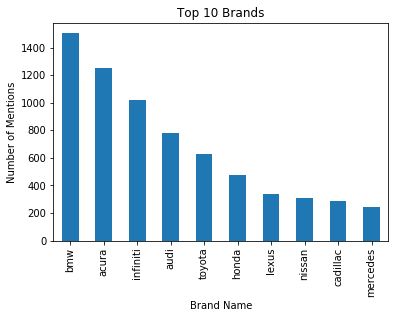

In [78]:
## Top 10 Brands by frequency of mentions

brandcounts = pd.Series(df_scraped['Brandlist'].sum()).value_counts()
brandcounts[:10].plot(kind = 'bar')
plt.xlabel('Brand Name')
plt.ylabel('Number of Mentions')
plt.title('Top 10 Brands')

In [79]:

import itertools
from itertools import product

a = brandcounts.index.tolist()
b = brandcounts.index.tolist()
combinations = pd.DataFrame(itertools.product(a, b))
combinations.columns = ["Brand1","Brand2"]
combinations.head(5)

,Brand1,Brand2
0,bmw,bmw
1,bmw,acura
2,bmw,infiniti
3,bmw,audi
4,bmw,toyota


In [80]:

## Getting the individual Brand Occurences

def getcounts(s):
  counts = brandcounts[s]
  return counts


combinations['Brand1_occurence'] = combinations['Brand1'].map(getcounts)
combinations['Brand2_occurence'] = combinations['Brand2'].map(getcounts)
combinations.head(5)

,Brand1,Brand2,Brand1_occurence,Brand2_occurence
0,bmw,bmw,1504,1504
1,bmw,acura,1504,1253
2,bmw,infiniti,1504,1022
3,bmw,audi,1504,783
4,bmw,toyota,1504,629


In [81]:
## Getting the cooccurences

def getcooccurence(s):
  brands = s.split('&')
  cntr = 0
  if brands[0] != brands[1]:
    for lst in df_scraped['Brandlist'].values.tolist():
      if brands[0] in lst and brands[1] in lst:
        cntr = cntr+1
  return cntr

combinations['Brand1&Brand2'] = combinations['Brand1']+'&'+combinations['Brand2']
combinations['Cooccurence'] = combinations['Brand1&Brand2'].map(getcooccurence)
combinations.head(5)

,Brand1,Brand2,Brand1_occurence,Brand2_occurence,Brand1&Brand2,Cooccurence
0,bmw,bmw,1504,1504,bmw&bmw,0
1,bmw,acura,1504,1253,bmw&acura,479
2,bmw,infiniti,1504,1022,bmw&infiniti,480
3,bmw,audi,1504,783,bmw&audi,435
4,bmw,toyota,1504,629,bmw&toyota,309


In [82]:
## Calculating the lift

combinations['Lift'] = (5000 * combinations['Cooccurence'])/(combinations['Brand1_occurence']*combinations['Brand2_occurence'])
combinations.head(5)

,Brand1,Brand2,Brand1_occurence,Brand2_occurence,Brand1&Brand2,Cooccurence,Lift
0,bmw,bmw,1504,1504,bmw&bmw,0,0.000000
1,bmw,acura,1504,1253,bmw&acura,479,1.270886
2,bmw,infiniti,1504,1022,bmw&infiniti,480,1.561394
3,bmw,audi,1504,783,bmw&audi,435,1.846927
4,bmw,toyota,1504,629,bmw&toyota,309,1.633165


In [83]:
## Getting in Matrix Format for Lifts

brands = list(combinations['Brand1'].unique())
df_lifts = pd.DataFrame(index=brands, columns=brands)
for i in brands:
  for j in brands:
    x = combinations[combinations['Brand1'] == i]
    value = x[x['Brand2'] == j]['Lift'].values[0]
    df_lifts[i].loc[j] = value
 
df_lifts.iloc[:10,:10]

,bmw,acura,infiniti,audi,toyota,honda,lexus,nissan,cadillac,mercedes
bmw,0,1.27089,1.56139,1.84693,1.63316,1.36033,2.0519,1.21284,1.64486,1.7519
acura,1.27089,0,1.90931,1.47793,1.52258,1.83276,1.76431,1.53378,1.55724,1.22528
infiniti,1.56139,1.90931,0,1.84948,1.65672,1.47077,2.29375,2.02388,2.06264,1.52252
audi,1.84693,1.47793,1.84948,0,1.76647,1.43978,2.25489,1.47682,2.06923,2.43769
toyota,1.63316,1.52258,1.65672,1.76647,0,2.4561,3.06643,2.51161,1.88342,1.78113
honda,1.36033,1.83276,1.47077,1.43978,2.4561,0,1.4558,3.63814,1.09112,1.60258
lexus,2.0519,1.76431,2.29375,2.25489,3.06643,1.4558,0,1.59483,2.6365,4.18632
nissan,1.21284,1.53378,2.02388,1.47682,2.51161,3.63814,1.59483,0,1.19171,1.55433
cadillac,1.64486,1.55724,2.06264,2.06923,1.88342,1.09112,2.6365,1.19171,0,3.253
mercedes,1.7519,1.22528,1.52252,2.43769,1.78113,1.60258,4.18632,1.55433,3.253,0


In [84]:
## Getting in Matrix Format for MDS

brands = list(combinations['Brand1'].unique())
df = pd.DataFrame(index=brands, columns=brands)
for i in brands:
  for j in brands:
    x = combinations[combinations['Brand1'] == i]
    value = 1/(x[x['Brand2'] == j]['Lift'].values[0])
    if value == float("inf"):
      value = 0
    elif isnan(value):
      value = 0
    df[i].loc[j] = value
 
df.iloc[:10,:10]

,bmw,acura,infiniti,audi,toyota,honda,lexus,nissan,cadillac,mercedes
bmw,0,0.786853,0.640453,0.54144,0.612308,0.735118,0.487354,0.824514,0.607955,0.570809
acura,0.786853,0,0.523749,0.67662,0.656781,0.545625,0.566793,0.651985,0.642162,0.816143
infiniti,0.640453,0.523749,0,0.540693,0.603604,0.679914,0.435967,0.494101,0.484817,0.656805
audi,0.54144,0.67662,0.540693,0,0.5661,0.69455,0.443481,0.67713,0.483271,0.410224
toyota,0.612308,0.656781,0.603604,0.5661,0,0.40715,0.326112,0.398151,0.53095,0.561441
honda,0.735118,0.545625,0.679914,0.69455,0.40715,0,0.686906,0.274865,0.916487,0.623995
lexus,0.487354,0.566793,0.435967,0.443481,0.326112,0.686906,0,0.627024,0.37929,0.238874
nissan,0.824514,0.651985,0.494101,0.67713,0.398151,0.274865,0.627024,0,0.839133,0.643365
cadillac,0.607955,0.642162,0.484817,0.483271,0.53095,0.916487,0.37929,0.839133,0,0.307409
mercedes,0.570809,0.816143,0.656805,0.410224,0.561441,0.623995,0.238874,0.643365,0.307409,0


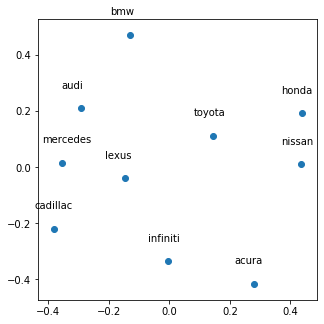

In [85]:
#https://datascience.stackexchange.com/questions/49316/multidimensional-scaling-producing-different-results-for-different-seeds

from sklearn import manifold

df_new = df.iloc[:10,:10]

#df_new = df
mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=6)
results = mds.fit(df_new.values)

brands = df_new.columns
coords = results.embedding_

fig = plt.figure(figsize=(5,5))

plt.subplots_adjust(bottom = 0.1)
plt.scatter(coords[:, 0], coords[:, 1])

for label, x, y in zip(brands, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), 
        xytext = (-20, 20),
        textcoords = 'offset points'
    )
plt.show()


Points to notice from the MDS above:

1) Nissan, Honda and Toyota are comparable brands

2) Mercedes, Audi and Lexus are comparable brands

3) Cadillac is close to Mercedes and no other brands

4) BMW isn't talked with any of the other brands. It suggests that people who own a BMW tend to stick with a BMW

5) Infiniti and Acura are in a cluster of their own

# Task B

**BMW:** BMW is far away from all the other brands, which means that it was co-mentioned the least with other brands. This would suggest that BMW owners do not consider switching to other brands as easily. The lack of co-mentions with other brands also suggest that owners of other brands don't consider switching to BMW as often either.

**Cadillac:** Cadillac is appearing alongside mercedes, lexus, and audi, which makes sense from a luxury brand standpoint. However, Cadillac is not generally considered a performance brand. Therefore, it is interesting that it is appearing alongside high performance luxury brands. Cadillac has invested alot in recent year to improve brand recognition among the youth and perhaps its proximity to performance brands in the above plot is a result of that.

# Task C

In [86]:
df_scraped.head(5)

,Unnamed: 0,Username,Time,Subject,Cleaned,Brandlist
0,0,merc1,"March 25, 2002 5:54AM",I personally think that with a few tweaks the ...,"[personally, think, tweaks, c320, could, also,...","[bmw, toyota, cadillac, chrysler, ford, buick,..."
1,1,fredvh,"March 25, 2002 7:06AM",I am debating a new purchase and these two are...,"[debating, new, purchase, two, top, list, pric...","[lexus, honda, acura]"
2,2,blueguydotcom,"March 25, 2002 5:02PM","Great handling, RWD, excellent engine and the ...","[great, handling, rwd, excellent, engine, best...",[]
3,3,hungrywhale,"March 25, 2002 11:04PM",And no manual tranny. That may not matter to y...,"[manual, tranny, may, matter, certainly, matte...",[]
4,4,riez,"March 26, 2002 12:44AM",One beauty of BMW 3 Series is that there are s...,"[one, beauty, bmw, series, many, models, choos...",[bmw]


In [87]:
## Getting the top most frequent words

wordcounts = pd.Series(df_scraped['Cleaned'].sum()).value_counts()
wordfrequency = pd.DataFrame(wordcounts)
wordfrequency.reset_index(inplace= True)
wordfrequency.columns = ["Words","Count"]
wordfrequency.head(5)

,Words,Count
0,,7574
1,car,3938
2,s,3902
3,nt,3395
4,cars,1960


Looked at the frequenct words in the comments of users and grouped these words into five major attributes.

**1) Performance:** If the user talks about the performance of the car. We grouped words like: Engine, Power, Torque, RPM, HorsePower etc

**2) Features and Styling:** If the user is talking about the internal or external features about the car then they are grouped together. It contains words like: Leather, Design, Interior, Looks, Sporty etc

**3) Feel and Comfort:** If the user describes how he feels while driving the car we group them under this category. It has words like Luxury, Handling, Fun, Reliable, Quality, Experience etc

**4) Economic:** If the user talks about the price or mileage details of the cars they come under this category. It has words like Value, Money, Deal, Mileage, MPG etc

**5) Dealership Services:** If the user talks about thier experience with the dealership or the sales representatives we include them here. It has words like Dealer, Service, Warranty, Support, Salesman etc

In [88]:
## Importing the Words - Attributes file

df_attributes = pd.read_csv('Attributes Lookup Updated.csv')
print(df_attributes.head(5))

      Words           Attributes  Frequency
0    dealer  Dealership Services        206
1      care  Dealership Services        170
2   service  Dealership Services        118
3  warranty  Dealership Services        105
4      help  Dealership Services        100


In [89]:
### Getting the list of attributes and features discussed in each comment

words_list = list(df_attributes['Words'].values)

def getwordlist(l):
  words = []
  for w in l:
    if w in words_list:
      words.append(w)
  return list(set(words))



df_scraped['WordsList'] = df_scraped['Cleaned'].map(getwordlist)

df_scraped.head(5)

,Unnamed: 0,Username,Time,Subject,Cleaned,Brandlist,WordsList
0,0,merc1,"March 25, 2002 5:54AM",I personally think that with a few tweaks the ...,"[personally, think, tweaks, c320, could, also,...","[bmw, toyota, cadillac, chrysler, ford, buick,...","[6speed, money, seats, save, suspension, sport..."
1,1,fredvh,"March 25, 2002 7:06AM",I am debating a new purchase and these two are...,"[debating, new, purchase, two, top, list, pric...","[lexus, honda, acura]","[worth, service, prices, quality, price]"
2,2,blueguydotcom,"March 25, 2002 5:02PM","Great handling, RWD, excellent engine and the ...","[great, handling, rwd, excellent, engine, best...",[],"[handling, engine, warranty]"
3,3,hungrywhale,"March 25, 2002 11:04PM",And no manual tranny. That may not matter to y...,"[manual, tranny, may, matter, certainly, matte...",[],[manual]
4,4,riez,"March 26, 2002 12:44AM",One beauty of BMW 3 Series is that there are s...,"[one, beauty, bmw, series, many, models, choos...",[bmw],"[performance, manual, engine, transmission]"


In [90]:
## Getting the number of times the features were mentioned throughout
featurecounts = pd.Series(pd.Series(df_scraped['WordsList'].sum()).value_counts())
featurecounts.head()

performance    663
luxury         446
engine         435
price          428
buy            424
dtype: int64

In [91]:
## Getting combinations of brands and Features. Only the TOP 5 brands are considered here

import itertools
from itertools import product

a = brandcounts[:5].index.tolist()
b = df_attributes['Words'].unique().tolist()
brand_feature_comb = pd.DataFrame(itertools.product(a, b))
brand_feature_comb.columns = ["Brand","Words"]
brand_feature_comb.head(5)

,Brand,Words
0,bmw,dealer
1,bmw,care
2,bmw,service
3,bmw,warranty
4,bmw,help


In [92]:
## Getting the Brand and Feature occurences

def brandcounter(s):
  counts = brandcounts[s]
  return counts

def featcounter(s):
  counts = featurecounts[s]
  return counts

brand_feature_comb['Brand_occurence'] = brand_feature_comb['Brand'].map(brandcounter)
brand_feature_comb['Feature_occurence'] = brand_feature_comb['Words'].map(featcounter)
brand_feature_comb.head(5)

,Brand,Words,Brand_occurence,Feature_occurence
0,bmw,dealer,1504,153
1,bmw,care,1504,153
2,bmw,service,1504,81
3,bmw,warranty,1504,81
4,bmw,help,1504,94


In [93]:
## Getting the brand and feature cooccurences
brand_byuser = df_scraped['Brandlist'].values.tolist()
feat_byuser = df_scraped['WordsList'].values.tolist()

def getcooccurence(s):
  brand = s.split('&')[0]
  feature = s.split('&')[1]
  cntr = 0
  for i in range(5000):
    if brand in brand_byuser[i] and feature in feat_byuser[i]:
      cntr+=1
  return cntr

brand_feature_comb['Brand&Feat'] = brand_feature_comb['Brand']+'&'+brand_feature_comb['Words']
brand_feature_comb['Cooccurence'] = brand_feature_comb['Brand&Feat'].map(getcooccurence)
brand_feature_comb.head(5)

,Brand,Words,Brand_occurence,Feature_occurence,Brand&Feat,Cooccurence
0,bmw,dealer,1504,153,bmw&dealer,67
1,bmw,care,1504,153,bmw&care,68
2,bmw,service,1504,81,bmw&service,40
3,bmw,warranty,1504,81,bmw&warranty,32
4,bmw,help,1504,94,bmw&help,31


In [94]:
## Calculating the lift

brand_feature_comb['Lift'] = (5000 * brand_feature_comb['Cooccurence'])/(brand_feature_comb['Brand_occurence']*brand_feature_comb['Feature_occurence'])
brand_feature_comb.head(5)

,Brand,Words,Brand_occurence,Feature_occurence,Brand&Feat,Cooccurence,Lift
0,bmw,dealer,1504,153,bmw&dealer,67,1.455813
1,bmw,care,1504,153,bmw&care,68,1.477541
2,bmw,service,1504,81,bmw&service,40,1.641713
3,bmw,warranty,1504,81,bmw&warranty,32,1.313370
4,bmw,help,1504,94,bmw&help,31,1.096367


In [95]:
## We need to shortlist the features which has lift > 1 for all of the top 5 brands

## Here we are getting all combinations of brand and feature which has lift > 1 and seeing for each feature how many brands it has a lift > 1
feat_brand_good_lifts = brand_feature_comb[brand_feature_comb['Lift'] > 1]['Words'].value_counts()

## Shortlisting the features which has lift > 1 for all 5 brands

shortlisted_features = list(feat_brand_good_lifts[feat_brand_good_lifts == 5].index)
len(shortlisted_features)

93

Grouping these shortlisted features into 5 attributes and looking at assosciations by brand

In [96]:
len(shortlisted_features)

93

In [97]:
### Getting the list of attributes from the shortlisted features

words_list = shortlisted_features

def getlist(l):
  attributes = []
  for w in l:
    if w in words_list:
      att = df_attributes[df_attributes['Words'] == w]['Attributes'].values[0]
      attributes.append(att)
  return list(set(attributes))


df_scraped['AttributesList'] = df_scraped['Cleaned'].map(getlist)

df_scraped.head(5)

,Unnamed: 0,Username,Time,Subject,Cleaned,Brandlist,WordsList,AttributesList
0,0,merc1,"March 25, 2002 5:54AM",I personally think that with a few tweaks the ...,"[personally, think, tweaks, c320, could, also,...","[bmw, toyota, cadillac, chrysler, ford, buick,...","[6speed, money, seats, save, suspension, sport...","[Feel and Comfort, Performance, Dealership Ser..."
1,1,fredvh,"March 25, 2002 7:06AM",I am debating a new purchase and these two are...,"[debating, new, purchase, two, top, list, pric...","[lexus, honda, acura]","[worth, service, prices, quality, price]","[Economic, Feel and Comfort]"
2,2,blueguydotcom,"March 25, 2002 5:02PM","Great handling, RWD, excellent engine and the ...","[great, handling, rwd, excellent, engine, best...",[],"[handling, engine, warranty]","[Feel and Comfort, Performance]"
3,3,hungrywhale,"March 25, 2002 11:04PM",And no manual tranny. That may not matter to y...,"[manual, tranny, may, matter, certainly, matte...",[],[manual],[]
4,4,riez,"March 26, 2002 12:44AM",One beauty of BMW 3 Series is that there are s...,"[one, beauty, bmw, series, many, models, choos...",[bmw],"[performance, manual, engine, transmission]",[Performance]


In [98]:
## Getting the number of times the attributes were mentioned throughout
attcounts = pd.Series(pd.Series(df_scraped['AttributesList'].sum()).value_counts())
attcounts

Feel and Comfort        2269
Performance             1901
Economic                1855
Features and Styling    1620
Dealership Services      499
dtype: int64

In [99]:
## Getting combinations of brands and attributes

import itertools
from itertools import product

a = brandcounts[:5].index.tolist()
b = df_attributes['Attributes'].unique().tolist()
brand_att_comb = pd.DataFrame(itertools.product(a, b))
brand_att_comb.columns = ["Brand","Attributes"]
brand_att_comb.head(5)

,Brand,Attributes
0,bmw,Dealership Services
1,bmw,Economic
2,bmw,Features and Styling
3,bmw,Feel and Comfort
4,bmw,Performance


In [100]:

## Getting the Brand and Attribute occurences

def brandcounter(s):
  counts = brandcounts[s]
  return counts

def attcounter(s):
  counts = attcounts[s]
  return counts

brand_att_comb['Brand_occurence'] = brand_att_comb['Brand'].map(brandcounter)
brand_att_comb['Attribute_occurence'] = brand_att_comb['Attributes'].map(attcounter)
brand_att_comb.head(5)

,Brand,Attributes,Brand_occurence,Attribute_occurence
0,bmw,Dealership Services,1504,499
1,bmw,Economic,1504,1855
2,bmw,Features and Styling,1504,1620
3,bmw,Feel and Comfort,1504,2269
4,bmw,Performance,1504,1901


In [101]:
## Getting the brand and attribute cooccurences
brand_byuser = df_scraped['Brandlist'].values.tolist()
att_byuser = df_scraped['AttributesList'].values.tolist()

def getcooccurence(s):
  brand = s.split('&')[0]
  attribute = s.split('&')[1]
  cntr = 0
  for i in range(5000):
    if brand in brand_byuser[i] and attribute in att_byuser[i]:
      cntr+=1
  return cntr

brand_att_comb['Brand&Att'] = brand_att_comb['Brand']+'&'+brand_att_comb['Attributes']
brand_att_comb['Cooccurence'] = brand_att_comb['Brand&Att'].map(getcooccurence)
brand_att_comb.head(5)

,Brand,Attributes,Brand_occurence,Attribute_occurence,Brand&Att,Cooccurence
0,bmw,Dealership Services,1504,499,bmw&Dealership Services,206
1,bmw,Economic,1504,1855,bmw&Economic,796
2,bmw,Features and Styling,1504,1620,bmw&Features and Styling,590
3,bmw,Feel and Comfort,1504,2269,bmw&Feel and Comfort,884
4,bmw,Performance,1504,1901,bmw&Performance,757


In [102]:
## Calculating the lift

brand_att_comb['Lift'] = (5000 * brand_att_comb['Cooccurence'])/(brand_att_comb['Brand_occurence']*brand_att_comb['Attribute_occurence'])
brand_att_comb.head(5)

,Brand,Attributes,Brand_occurence,Attribute_occurence,Brand&Att,Cooccurence,Lift
0,bmw,Dealership Services,1504,499,bmw&Dealership Services,206,1.372426
1,bmw,Economic,1504,1855,bmw&Economic,796,1.426564
2,bmw,Features and Styling,1504,1620,bmw&Features and Styling,590,1.210763
3,bmw,Feel and Comfort,1504,2269,bmw&Feel and Comfort,884,1.295209
4,bmw,Performance,1504,1901,bmw&Performance,757,1.323841


In [103]:
## Getting in Matrix Format for Lifts

brands = list(brand_att_comb['Brand'].unique())
atts = list(brand_att_comb['Attributes'].unique())

df_associations = pd.DataFrame(index=brands, columns=atts)
for i in brands:
  for j in atts:
    x = brand_att_comb[brand_att_comb['Brand'] == i]
    value = x[x['Attributes'] == j]['Lift'].values[0]
    df_associations[j].loc[i] = value
 
df_associations

,Dealership Services,Economic,Features and Styling,Feel and Comfort,Performance
bmw,1.37243,1.42656,1.21076,1.29521,1.32384
acura,1.33547,1.36169,1.33999,1.26448,1.30145
infiniti,1.65693,1.43738,1.41939,1.30664,1.33569
audi,1.35648,1.53532,1.4624,1.39309,1.40075
toyota,1.27441,1.5684,1.43771,1.49944,1.46354


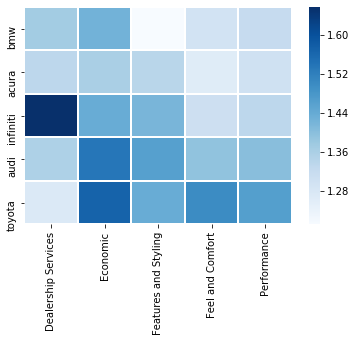

In [104]:
## Getting the heatmaps

df_heatmap = df_associations
df_heatmap = df_heatmap.apply(pd.to_numeric, errors='coerce')
sns.heatmap(df_heatmap, cmap='Blues',linewidths=1, linecolor='white')

# Task D

**(i) Advice to Product Manager based on the crowd perception:**

**BMW:** Features and Styling are rated low for BMW when compared with the other top 5 brands. Therefore, it is worthwhile to consider engineering better standout features and styling options for BMW entry level luxury models.

**Acura:** Acura does not seem to be differentiated from their competition on the 5 main attributes considered in any significant way. It is advisable to focus on one of the most talked about attributes in order to stand out among potential buyers.

**Infiniti:** Infiniti stands out from the brands as the best dealership service provider. While this should be continued, product managers should look into improving the feel and comfort and/or performance as Infiniti scales lower on these two attributes.

**Audi:** Audi is ranked well in regards to the main attributes considered, especially on features and styling and economic value. They have opportunity to improve their dealership services.

**Toyota:** Toyota ranks the best in economic value, feel and comfort, and performance. They also have opportunity to improve their dealership services.

**(ii) Advice to Marketing/Advertising Manager based on the crowd perception:**

**BMW:** BMW markets themselves as the 'ultimate driving machine'. However, they do not rank very high in performance compared to the other brands. Based on the MDS plot, BMW is isolated from the other brands, which could imply that BMW owners do not typically switch to other brands, and also that other brand owners do not easily switch to BMW as often. Therefore, while they should continue their marketing efforts to their existing customers, they should also consider improving acquisition efforts. They should consider leveraging their existing base to attract new customers.

**Acura:** Acura markets themselves as 'precision crafted performance'. However, performance is not mentioned alongside Acura among the top 5 brands based on our analysis. Therefore, if they want to indeed market themselves as a performance brand, they should consider specific marketing campaigns that emphasizes their performance.

**Infiniti:** Infiniti is doing extremely well on their dealership services. Therefore, they should make it a point to market their stellar customer service as a point of attraction. 

**Audi:** Audi is the best brand in features and styling from the top 5. Hence, they should take advantage of this in their marketing efforts.

**Toyota:** Toyota made it to the top 5 brands in entry level luxury sedans as opposed to other brands such as mercedes and cadillac. They were also ranked highest in feel and comfort, performance, and economic value compared to the other top 5 brands. Toyota marketing managers should market their products' feel and comfort as a distinguishing factor to increase association of Toyota with luxury.

# Task E

**Approach:** We created a list of aspirational words and a list of negation words. We then tokenized bigrams such that one of the two words will be aspirational and the other will not be a negation word. We then did a frequency analysis of the filtered bigrams and chose the top 10 aspirational bigrams. Next, we calculated the lift values between the top 10 aspirational bigrams and the top 10 brands and chose the most aspirational brand.

In [105]:
df_scraped.head()

,Unnamed: 0,Username,Time,Subject,Cleaned,Brandlist,WordsList,AttributesList
0,0,merc1,"March 25, 2002 5:54AM",I personally think that with a few tweaks the ...,"[personally, think, tweaks, c320, could, also,...","[bmw, toyota, cadillac, chrysler, ford, buick,...","[6speed, money, seats, save, suspension, sport...","[Feel and Comfort, Performance, Dealership Ser..."
1,1,fredvh,"March 25, 2002 7:06AM",I am debating a new purchase and these two are...,"[debating, new, purchase, two, top, list, pric...","[lexus, honda, acura]","[worth, service, prices, quality, price]","[Economic, Feel and Comfort]"
2,2,blueguydotcom,"March 25, 2002 5:02PM","Great handling, RWD, excellent engine and the ...","[great, handling, rwd, excellent, engine, best...",[],"[handling, engine, warranty]","[Feel and Comfort, Performance]"
3,3,hungrywhale,"March 25, 2002 11:04PM",And no manual tranny. That may not matter to y...,"[manual, tranny, may, matter, certainly, matte...",[],[manual],[]
4,4,riez,"March 26, 2002 12:44AM",One beauty of BMW 3 Series is that there are s...,"[one, beauty, bmw, series, many, models, choos...",[bmw],"[performance, manual, engine, transmission]",[Performance]


In [106]:
aspirational_words=['dream','dreaming','dreams','aspire','aspires','aspiring','wish','wishes','wishing','hope',
                    'hopes','hoping','desire','passion','aim']
non_aspirational_words=['no','never','not']

In [107]:
def getBigrams(text):
  bigrm = list(nltk.bigrams(text.split()))
  asp_bigrm=[]
  for i in range(len(bigrm)):
    if (bigrm[i][1] in aspirational_words) & (bigrm[i][0] not in non_aspirational_words):
      asp_bigrm.append(bigrm[i])
  return asp_bigrm

In [108]:
df_scraped['bigram_list']=df_scraped['Subject'].astype(str).map(getBigrams)
df_scraped.rename(columns={'bigram_list':'asp_list'},inplace=True)

In [109]:
total_asp_list=[]
total_brandlist=[]
for i in range(len(df_scraped)):
  total_asp_list=total_asp_list+df_scraped['asp_list'][i]
  total_brandlist=total_brandlist+df_scraped['Brandlist'][i]

In [110]:
pd.options.display.max_rows = 500
from collections import Counter
asp_count=pd.DataFrame(sorted(Counter(total_asp_list).items(), key=lambda x: x[1], reverse=True))
asp_count.rename(columns={0:'asp',1:'frequency'},inplace=True)
asp_count=asp_count[0:10]

In [111]:
pd.options.display.max_rows = 500
from collections import Counter
brand_count=pd.DataFrame(sorted(Counter(total_brandlist).items(), key=lambda x: x[1], reverse=True))
brand_count.rename(columns={0:'brand',1:'frequency'},inplace=True)
brand_count=brand_count[0:10]

In [112]:
asp_list=list(asp_count['asp'])
brand_list=list(brand_count['brand'])

In [113]:
asp_total=[]
asp_total.extend(asp_list*10)
brand_total=[]
brand_total.extend(brand_list*10)

In [114]:
brand_asp_pairs=list(zip(sorted(brand_total),asp_total))

In [115]:
def computeLift(brandA,AspB):
  Lift_AB=0
  N_AB=0
  N=len(df_scraped)
  N_A=brand_count[brand_count['brand']==brandA]['frequency'].values
  N_B=asp_count[asp_count['asp']==AspB]['frequency'].values
  for i in range(len(df_scraped)):
    if((brandA in df_scraped.iloc[i]['Brandlist']) & (AspB in df_scraped.iloc[i]['asp_list'])):
      N_AB+=1
  Lift_AB=(N*N_AB)/(N_A*N_B)
  return(Lift_AB)

In [116]:
brand_asp_assoc=[]
for i in range(len(brand_asp_pairs)):
  brand_asp_assoc.append((brand_asp_pairs[i],computeLift(brand_asp_pairs[i][0],brand_asp_pairs[i][1])[0]))

In [117]:
brand_asp_table=pd.DataFrame(brand_asp_assoc)
brand_asp_table.rename(columns={0:'brand_asp_pairs',1:'lift'},inplace=True)

In [118]:
brand_asp_table=brand_asp_table[brand_asp_table['lift']>1].sort_values(by='lift',ascending=False)

In [119]:
brand_asp_table

,brand_asp_pairs,lift
77,"(mercedes, (do, wish))",6.915629
63,"(lexus, (I'm, hoping))",5.934718
35,"(cadillac, (was, hoping))",5.807201
88,"(nissan, (to, aspire))",5.428882
99,"(toyota, (just, wish))",5.299417
98,"(toyota, (to, aspire))",5.299417
97,"(toyota, (do, wish))",5.299417
44,"(honda, (and, hope))",5.219207
69,"(lexus, (just, wish))",4.945598
67,"(lexus, (do, wish))",4.945598


In [120]:
brands_asp=pd.DataFrame(brand_asp_table['brand_asp_pairs'].values.tolist(), index=brand_asp_table.index)
brands_asp['lift']=brand_asp_table['lift']
brands_asp.rename(columns={0:'brandA',1:'aspB'},inplace=True)

In [121]:
brands_asp.groupby(['brandA'])['lift'].agg(mean).sort_values(ascending=False)

brandA
lexus       4.293679
cadillac    3.809876
toyota      3.589151
mercedes    3.576568
honda       3.566458
nissan      2.994110
infiniti    2.419313
bmw         2.216312
audi        1.785630
acura       1.692331
Name: lift, dtype: float64

Lexus is the most aspirational brand. 

The MDS plot places Lexus towards the mean of the top 10 brands we considered. Combined with the fact that Lexus has the highest average aspirational lift, it means that it is both easy to switch into and desired. Based on the MDS plot, Toyota and Infiniti were the non-higher end luxury brands closest to Lexus. Therefore, Lexus should target Toyota and Inifiniti owners in their marketing efforts.

In [122]:
df_scraped.to_csv('df_scraped.csv')